In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = pd.read_csv('PREFEITURA_FULL.csv', encoding='latin-1')

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Volumetria da base

In [3]:
full.shape

(1407452, 16)

# Missings

In [4]:
full[full == -1000].count()*100/1407452

ANO               0.000000
MES               0.000000
REGIAO            0.000924
MATRICULA         0.000000
NOME              0.000000
NASCIMENTO        0.000000
IDADE_AGORA       0.416071
IDADE_NA_EPOCA    0.417208
DATA_ATUAL        0.000000
SEXO              0.000000
COL               0.863759
HDL               3.680197
LDL               4.748723
TRIG              3.708475
NASC_DATA         0.376709
ATUAL_DATA        0.245976
dtype: float64

# Valores

In [5]:
full[full!= -1000].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ANO,1407452.0,2.012197e+03,2.562927,2008.0,2010.0,2012.0,2014.0,2016.0
MES,1407452.0,6.479226e+00,3.378087,1.0,3.0,7.0,9.0,12.0
IDADE_AGORA,1401596.0,5.467497e+01,20.115107,0.0,42.0,57.0,68.0,176.0
IDADE_NA_EPOCA,1401580.0,4.974909e+01,19.887794,-2.0,37.0,52.0,63.0,171.0
COL,1395295.0,1.951913e+02,45.173318,0.0,164.0,192.0,222.0,1305.0
HDL,1355655.0,5.075040e+01,14.782717,0.0,41.0,49.0,58.0,263.0
LDL,1340616.0,1.249349e+02,38.279779,0.0,98.0,122.0,148.0,846.0
TRIG,1355257.0,1.473757e+02,126.196611,-1.0,84.0,120.0,174.0,15604.0
NASC_DATA,1402150.0,1.962039e+07,202664.439063,18401231.0,19490225.0,19600726.0,19741103.0,20161219.0
ATUAL_DATA,1403990.0,2.017091e+07,0.000000,20170911.0,20170911.0,20170911.0,20170911.0,20170911.0


### Variáveis estranhas:
### TRIG com calor mínimo -1
### IDADE_EPOCA com valor mínimo -2
### REGIAO com valores xxx
###


# Quantidade de valores únicos

In [6]:
full[full!=-1000].nunique()

ANO                    9
MES                   12
REGIAO               284
MATRICULA         558786
NOME              634123
NASCIMENTO         67547
IDADE_AGORA          119
IDADE_NA_EPOCA       121
DATA_ATUAL           309
SEXO                   2
COL                  678
HDL                  216
LDL                  463
TRIG                2283
NASC_DATA          35854
ATUAL_DATA             1
dtype: int64

# Foi visto que existem diferente Nans

****Tratar base depois, pelo menos das variáveis numéricas

In [7]:
def preprocessing_nan(x):
    if(math.isnan(x)):
        return -1000
    else:
        return x

In [50]:
#Teste da função
#full.IDADE_AGORA.apply(lambda x: preprocessing_nan(x))

# Checando outliers visualmente

In [11]:
import seaborn as sns
import math
sns.set()

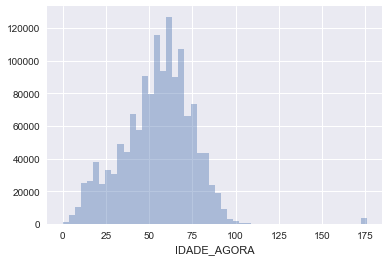

In [24]:
idades = full.IDADE_AGORA.apply(lambda x: preprocessing_nan(x))
idades = idades[idades != -1000]
sns.distplot(idades, norm_hist=False, kde = False)

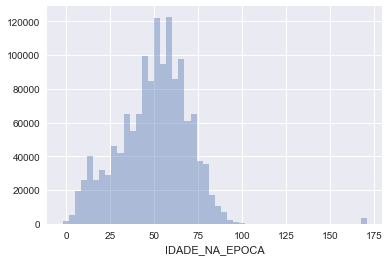

In [13]:
idades_epoca = full.IDADE_NA_EPOCA.apply(lambda x: preprocessing_nan(x))
idades_epoca = idades_epoca[idades_epoca != -1000]
sns.distplot(idades_epoca, norm_hist=False, kde = False)

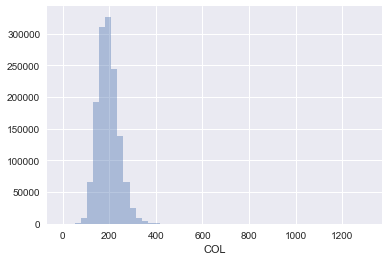

In [31]:
col = full.COL.apply(lambda x: preprocessing_nan(x))
col = col[col != -1000]
sns.distplot(col ,norm_hist=False, kde = False)

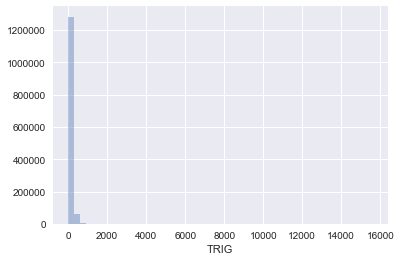

In [15]:
TRIG = full.TRIG.apply(lambda x: preprocessing_nan(x))
TRIG = TRIG[TRIG !=-1000]
sns.distplot(TRIG, norm_hist=False, kde = False)

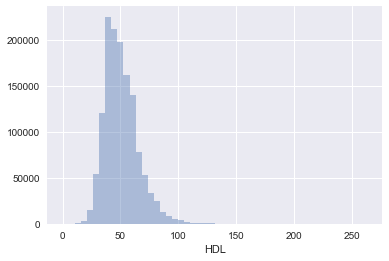

In [16]:
HDL = full.HDL.apply(lambda x: preprocessing_nan(x))
HDL = HDL[HDL != -1000]
sns.distplot(HDL, norm_hist=False, kde = False)

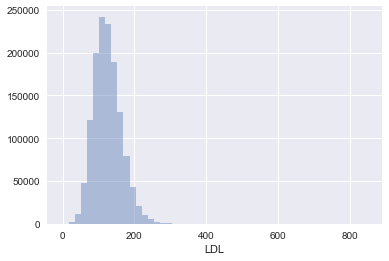

In [17]:
LDL = full.LDL.apply(lambda x: preprocessing_nan(x))
LDL = LDL[LDL != -1000]
sns.distplot(LDL, norm_hist=False, kde = False)

é possível a partir dos histogramas que existem muitos valores fora dos valores normais

Esse viés pode ser algo enviesado por algum ano ou até mesmo pela época do ano, então vamos plotar histogramas por ano e depois por meses

# Distribuição dos dados quantitativos por Ano

### Idades comparando o total com o por ano

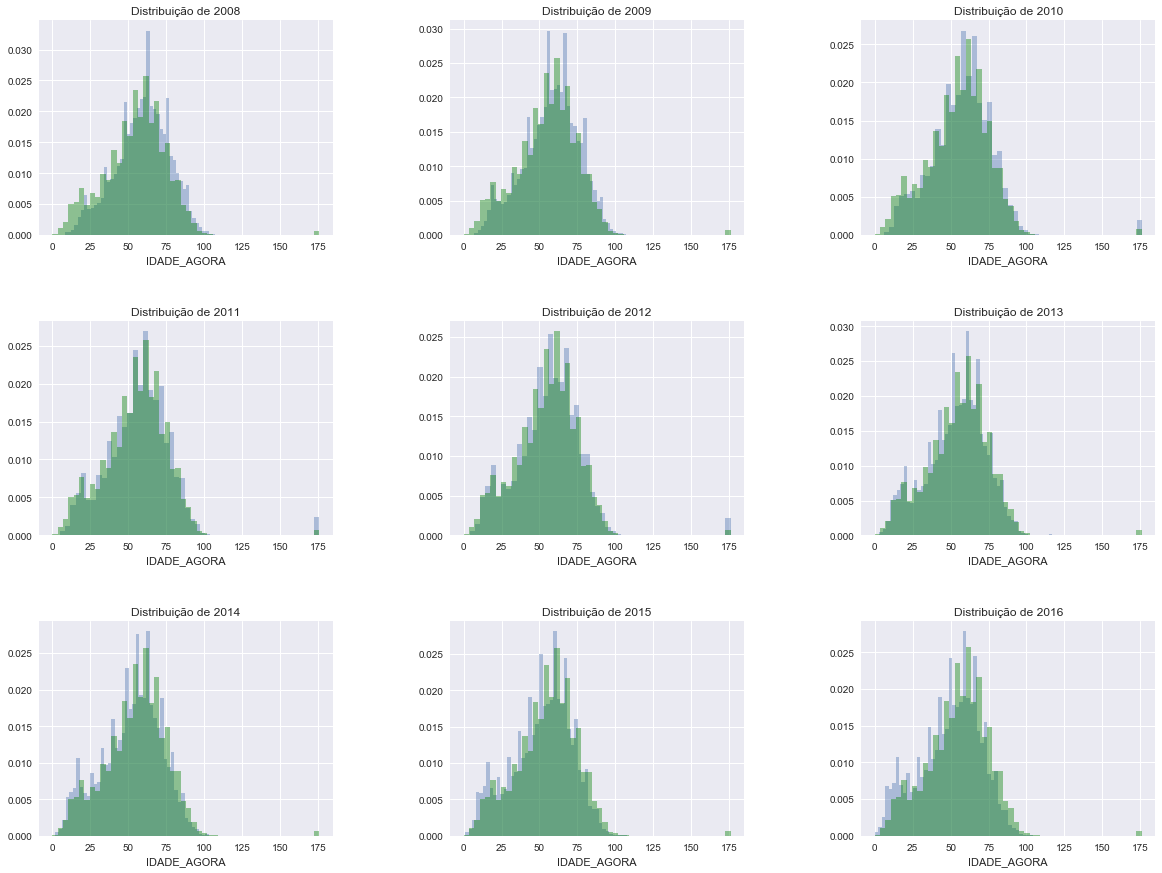

In [28]:
anos = full.ANO.unique()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(anos)):
    ax = fig.add_subplot(3, 3, i+1)
    title = "Distribuição de "+ str(anos[i])
    plt.title(title)
    idades_ano = full[full.ANO == anos[i]].IDADE_AGORA.apply(lambda x: preprocessing_nan(x))
    idades_ano = idades_ano[idades_ano != -1000]
    sns.distplot(idades_ano, norm_hist=True, kde = False, ax = ax)
    sns.distplot(idades, norm_hist=True, kde = False, ax = ax, color = 'g')

### Col comparando total e por ano

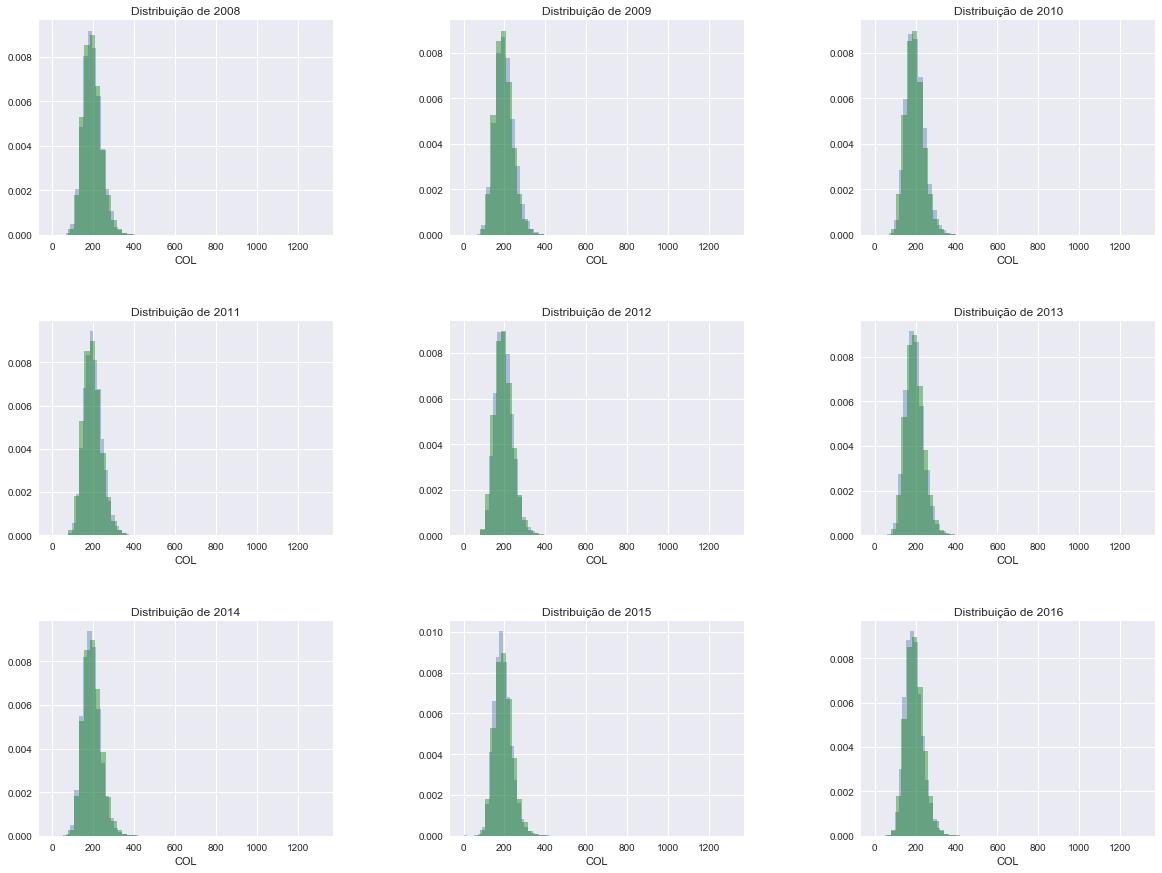

In [32]:
anos = full.ANO.unique()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(anos)):
    ax = fig.add_subplot(3, 3, i+1)
    title = "Distribuição de "+ str(anos[i])
    plt.title(title)
    COL_ano = full[full.ANO == anos[i]].COL.apply(lambda x: preprocessing_nan(x))
    COL_ano = COL_ano[COL_ano != -1000]
    sns.distplot(COL_ano, norm_hist=True, kde = False, ax = ax)
    sns.distplot(col, norm_hist=True, kde = False, ax = ax, color = 'g')

### Trig por ano e total


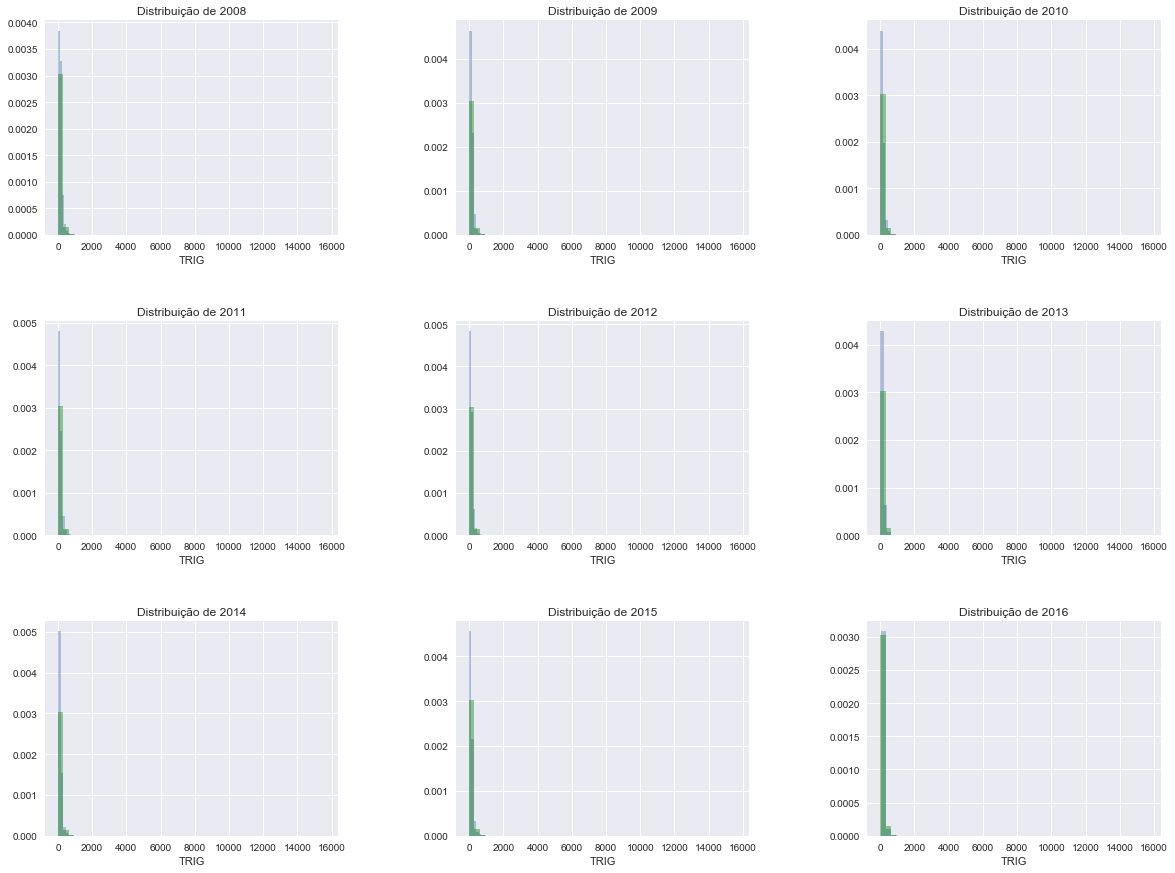

In [33]:
anos = full.ANO.unique()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(anos)):
    ax = fig.add_subplot(3, 3, i+1)
    title = "Distribuição de "+ str(anos[i])
    plt.title(title)
    TRIG_ano = full[full.ANO == anos[i]].TRIG.apply(lambda x: preprocessing_nan(x))
    TRIG_ano = TRIG_ano[TRIG_ano != -1000]
    sns.distplot(TRIG_ano, norm_hist=True, kde = False, ax = ax)
    sns.distplot(TRIG, norm_hist=True, kde = False, ax = ax, color = 'g')

### HDL por ano

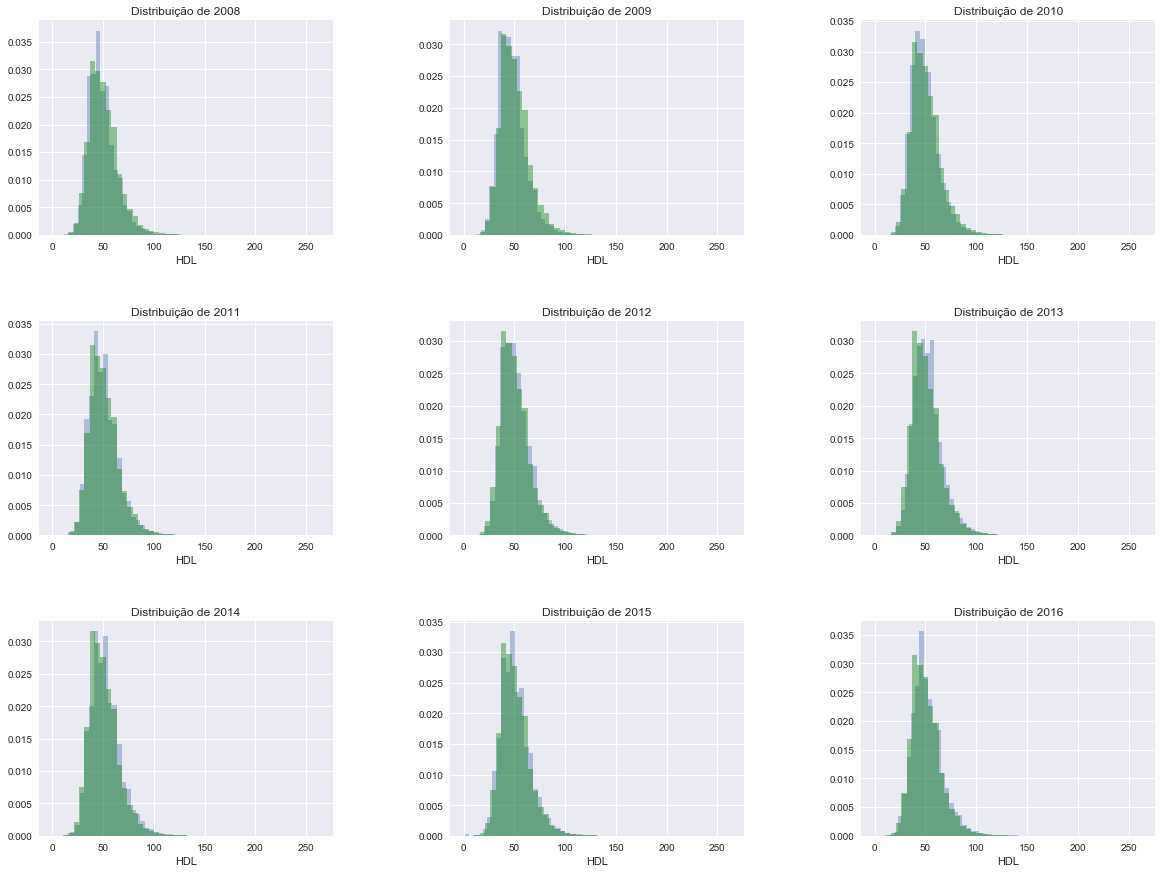

In [34]:
anos = full.ANO.unique()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(anos)):
    ax = fig.add_subplot(3, 3, i+1)
    title = "Distribuição de "+ str(anos[i])
    plt.title(title)
    HDL_ano = full[full.ANO == anos[i]].HDL.apply(lambda x: preprocessing_nan(x))
    HDL_ano = HDL_ano[HDL_ano != -1000]
    sns.distplot(HDL_ano, norm_hist=True, kde = False, ax = ax)
    sns.distplot(HDL, norm_hist=True, kde = False, ax = ax, color = 'g')

### LDL por ano

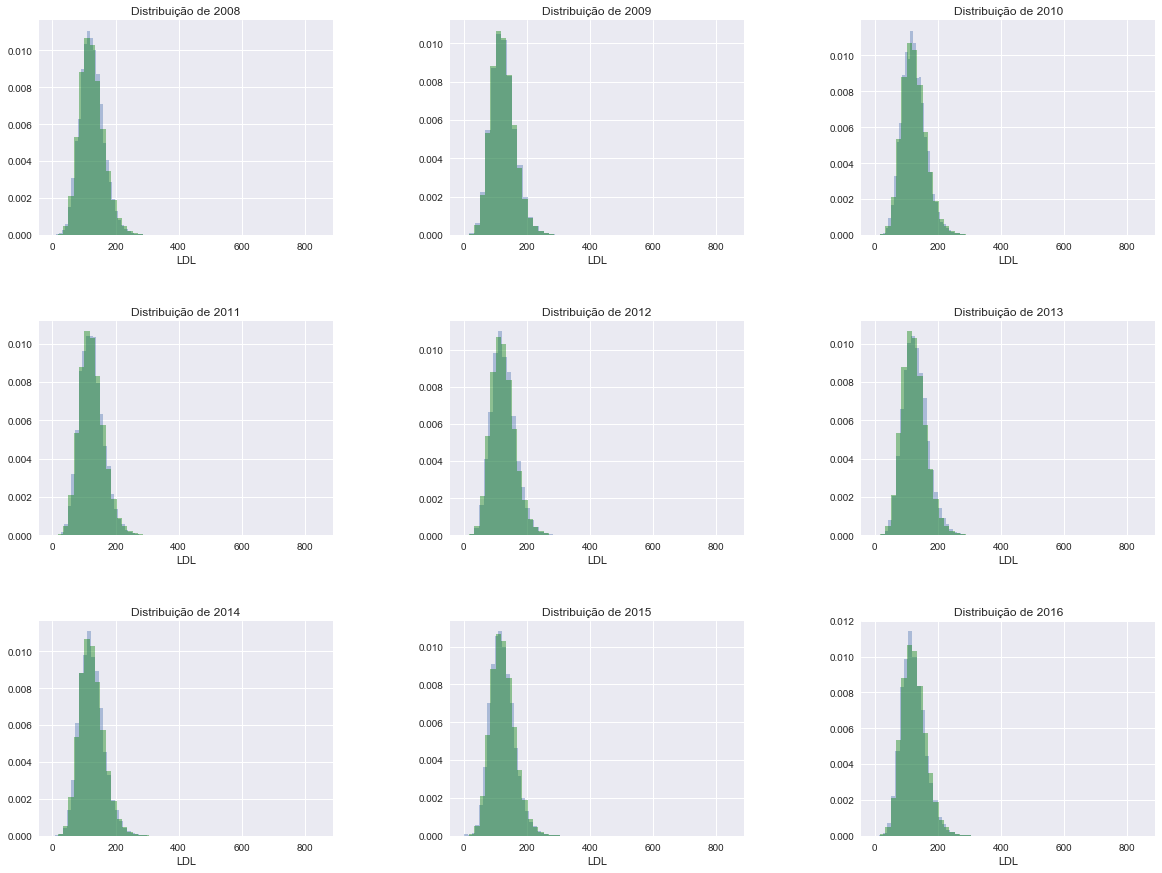

In [35]:
anos = full.ANO.unique()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(anos)):
    ax = fig.add_subplot(3, 3, i+1)
    title = "Distribuição de "+ str(anos[i])
    plt.title(title)
    LDL_ano = full[full.ANO == anos[i]].LDL.apply(lambda x: preprocessing_nan(x))
    LDL_ano = LDL_ano[LDL_ano != -1000]
    sns.distplot(LDL_ano, norm_hist=True, kde = False, ax = ax)
    sns.distplot(LDL, norm_hist=True, kde = False, ax = ax, color = 'g')

Aparentemente a distribuição é igual ao longo dos anos

# Agora distribuições por ano

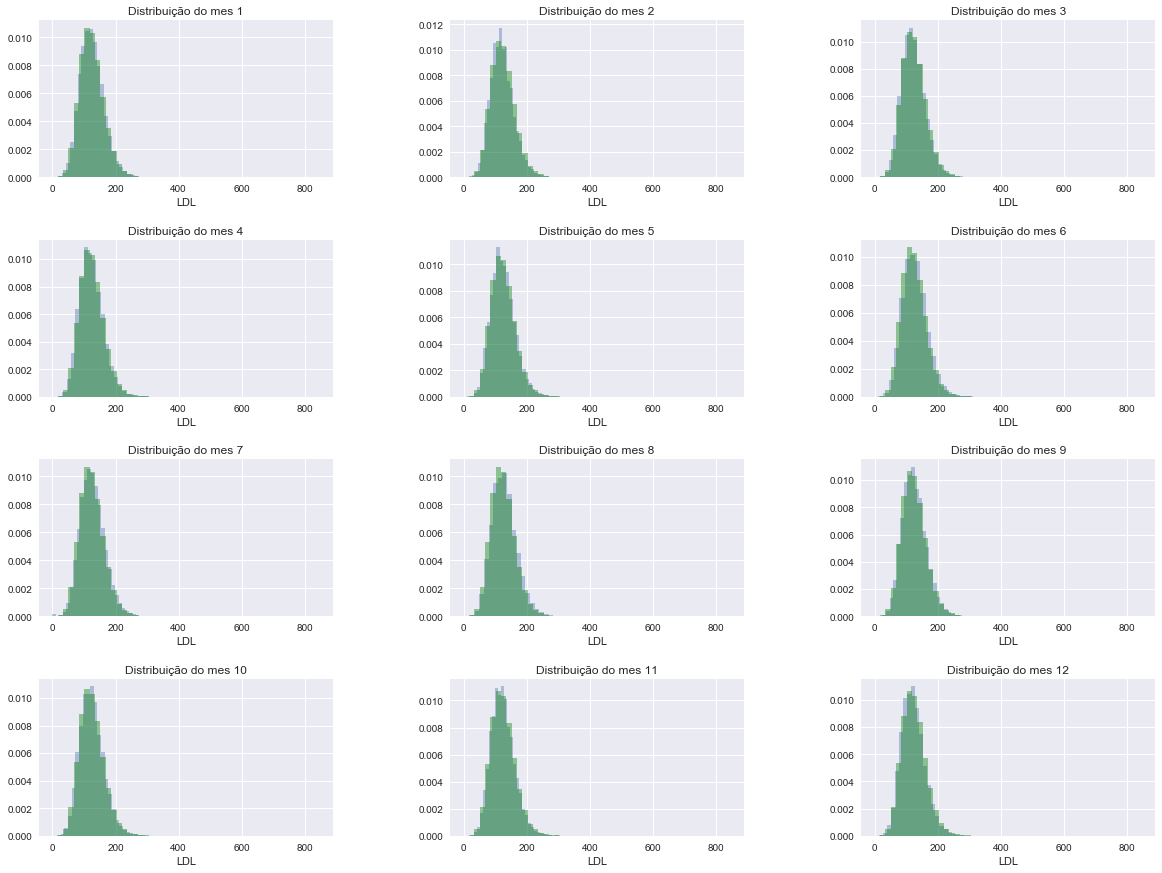

In [40]:
meses = full.MES.unique()
meses.sort()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(meses)):
    ax = fig.add_subplot(4, 3, i+1)
    title = "Distribuição do mes "+ str(meses[i])
    plt.title(title)
    LDL_mes = full[full.MES == meses[i]].LDL.apply(lambda x: preprocessing_nan(x))
    LDL_mes = LDL_mes[LDL_mes != -1000]
    sns.distplot(LDL_mes, norm_hist=True, kde = False, ax = ax)
    sns.distplot(LDL, norm_hist=True, kde = False, ax = ax, color = 'g')

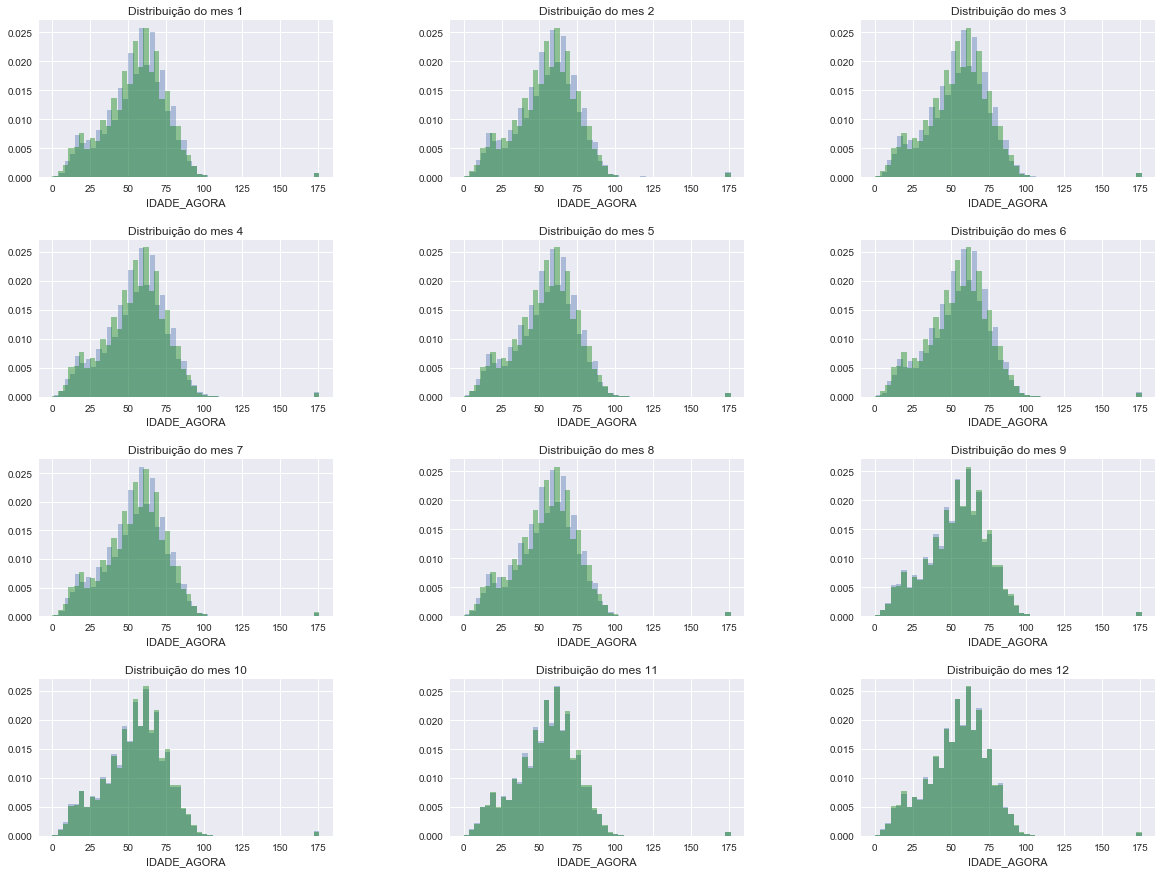

In [42]:
meses = full.MES.unique()
meses.sort()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(meses)):
    ax = fig.add_subplot(4, 3, i+1)
    title = "Distribuição do mes "+ str(meses[i])
    plt.title(title)
    IDADE_AGORA_mes = full[full.MES == meses[i]].IDADE_AGORA.apply(lambda x: preprocessing_nan(x))
    IDADE_AGORA_mes = IDADE_AGORA_mes[IDADE_AGORA_mes != -1000]
    sns.distplot(IDADE_AGORA_mes, norm_hist=True, kde = False, ax = ax)
    sns.distplot(idades, norm_hist=True, kde = False, ax = ax, color = 'g')

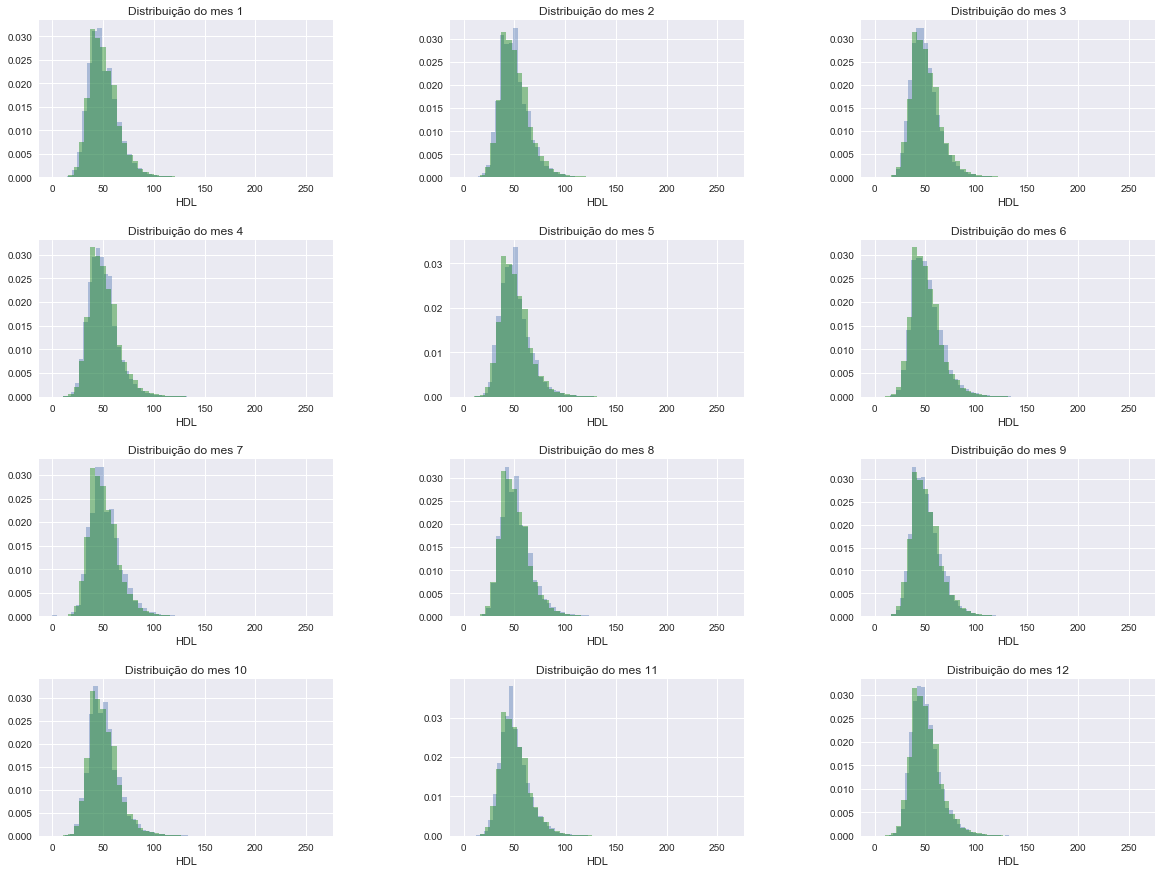

In [43]:
meses = full.MES.unique()
meses.sort()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(meses)):
    ax = fig.add_subplot(4, 3, i+1)
    title = "Distribuição do mes "+ str(meses[i])
    plt.title(title)
    HDL_mes = full[full.MES == meses[i]].HDL.apply(lambda x: preprocessing_nan(x))
    HDL_mes = HDL_mes[HDL_mes != -1000]
    sns.distplot(HDL_mes, norm_hist=True, kde = False, ax = ax)
    sns.distplot(HDL, norm_hist=True, kde = False, ax = ax, color = 'g')

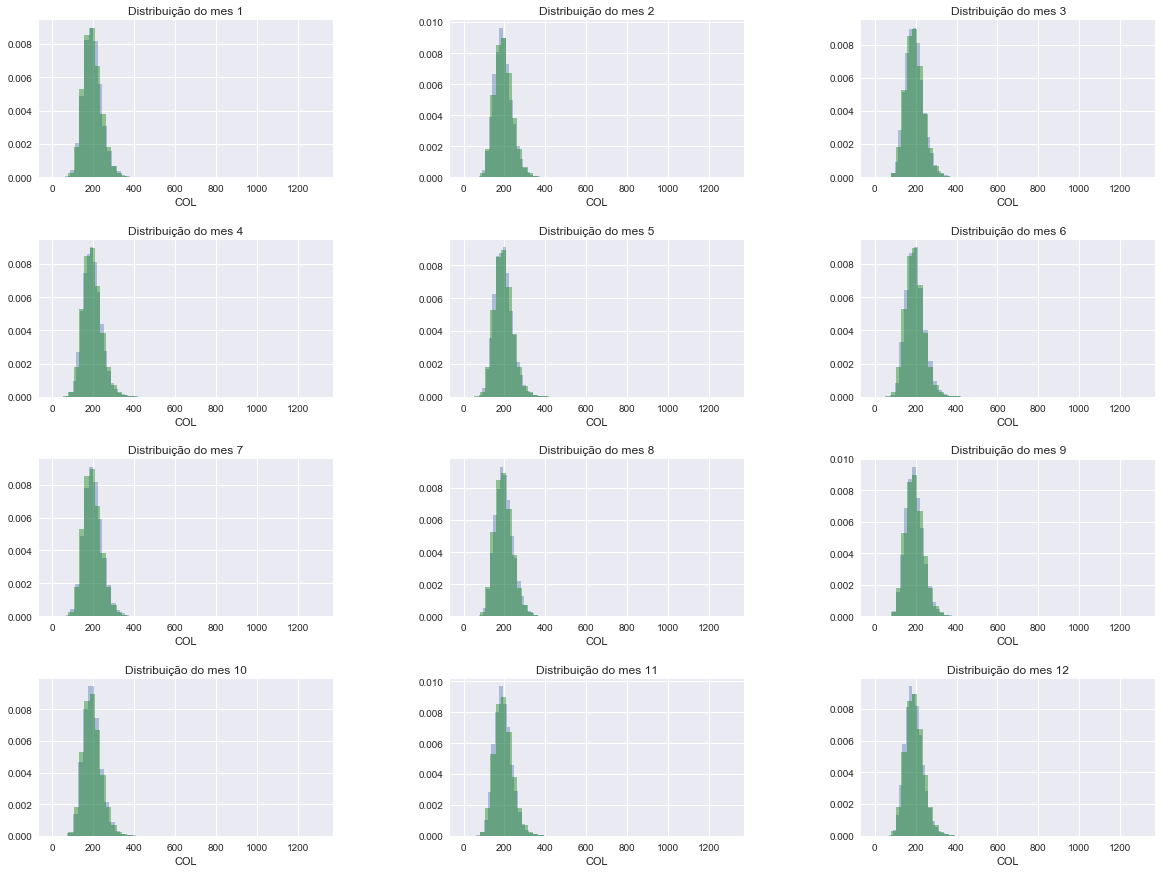

In [45]:
meses = full.MES.unique()
meses.sort()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(meses)):
    ax = fig.add_subplot(4, 3, i+1)
    title = "Distribuição do mes "+ str(meses[i])
    plt.title(title)
    COL_mes = full[full.MES == meses[i]].COL.apply(lambda x: preprocessing_nan(x))
    COL_mes = COL_mes[COL_mes != -1000]
    sns.distplot(COL_mes, norm_hist=True, kde = False, ax = ax)
    sns.distplot(col, norm_hist=True, kde = False, ax = ax, color = 'g')

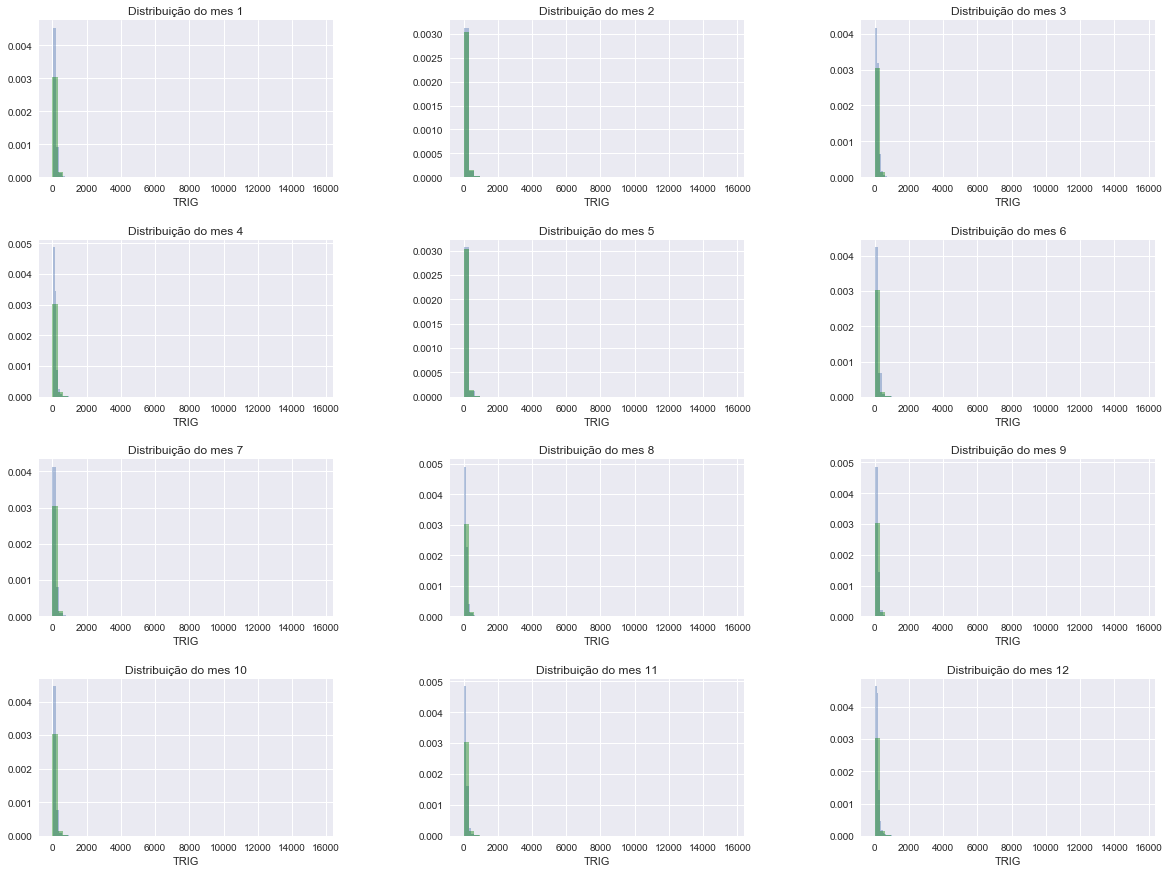

In [46]:
meses = full.MES.unique()
meses.sort()

fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(meses)):
    ax = fig.add_subplot(4, 3, i+1)
    title = "Distribuição do mes "+ str(meses[i])
    plt.title(title)
    TRIG_mes = full[full.MES == meses[i]].TRIG.apply(lambda x: preprocessing_nan(x))
    TRIG_mes = TRIG_mes[TRIG_mes != -1000]
    sns.distplot(TRIG_mes, norm_hist=True, kde = False, ax = ax)
    sns.distplot(TRIG, norm_hist=True, kde = False, ax = ax, color = 'g')

Aparentemente as distribuições por MES também são semelhantes

#### Podemos presumir então que a distribuição dos valores das variáveis são condizentes com a realidade

A distribuição das variáveis podem estar relacionadas com ser o mesmo paciente ao longo dos anos e meses, então vamos checar a rolagem de pacientes

# Rolagem de pacientes

## Rolagem de anos

In [49]:
len(set(full[full.ANO == 2008].NOME).intersection(set(full[full.ANO == 2009].NOME)))

33832

In [68]:
len(full[full.ANO == 2008].NOME)

123671

In [97]:
def rolagem(data,var,var_rol):
    
    rol = []
    
    eixo_x = data[var_rol].unique()
    eixo_x = [int(d) for d in eixo_x]
    eixo_x.sort()
    
    for i in range(len(eixo_x) - 1):
        qtde_var_rol = len(data[data[var_rol] == eixo_x[i+1]][var])
        intersec = len(set(data[data[var_rol] == eixo_x[i]][var]).intersection(set(data[data[var_rol] == eixo_x[i+1]][var])))
        rol.append(intersec/qtde_var_rol)
        
        percent = round(intersec/qtde_var_rol, 2)*100
        
        print(f"A taxa de rolagem é de {percent}% de {eixo_x[i]} para {eixo_x[i+1]}")
    return rol

In [98]:
rol = rolagem(full, 'NOME', 'ANO')

A taxa de rolagem é de 23.0% de 2008 para 2009
A taxa de rolagem é de 23.0% de 2009 para 2010
A taxa de rolagem é de 24.0% de 2010 para 2011
A taxa de rolagem é de 27.0% de 2011 para 2012
A taxa de rolagem é de 26.0% de 2012 para 2013
A taxa de rolagem é de 23.0% de 2013 para 2014
A taxa de rolagem é de 27.0% de 2014 para 2015
A taxa de rolagem é de 27.0% de 2015 para 2016


## Rolagem de meses

In [99]:
rol = rolagem(full, 'NOME', 'MES')

A taxa de rolagem é de 18.0% de 1 para 2
A taxa de rolagem é de 17.0% de 2 para 3
A taxa de rolagem é de 35.0% de 3 para 4
A taxa de rolagem é de 18.0% de 4 para 5
A taxa de rolagem é de 16.0% de 5 para 6
A taxa de rolagem é de 17.0% de 6 para 7
A taxa de rolagem é de 19.0% de 7 para 8
A taxa de rolagem é de 17.0% de 8 para 9
A taxa de rolagem é de 18.0% de 9 para 10
A taxa de rolagem é de 19.0% de 10 para 11
A taxa de rolagem é de 19.0% de 11 para 12


# Checando a relação das medidas com idade e sexo

### Sexo

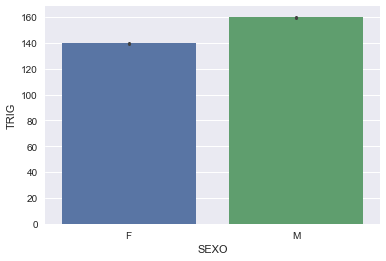

In [118]:
sns.barplot('SEXO', 'TRIG', data=full[full!=-1000], estimator=np.mean)

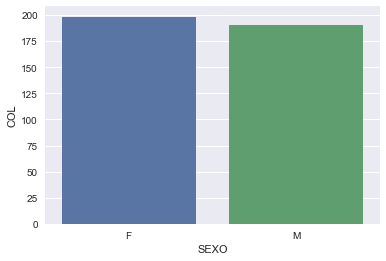

In [119]:
sns.barplot('SEXO', 'COL', data=full[full!=-1000], estimator=np.mean)

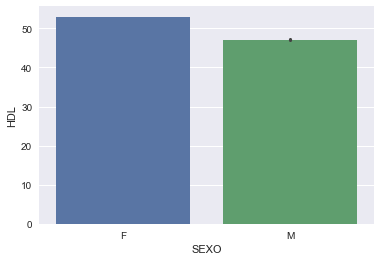

In [120]:
sns.barplot('SEXO', 'HDL', data=full[full!=-1000], estimator=np.mean)

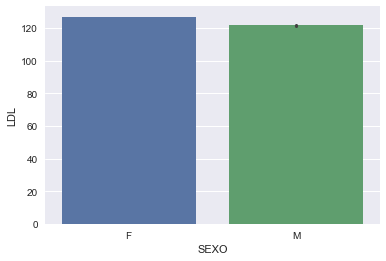

In [121]:
sns.barplot('SEXO', 'LDL', data=full[full!=-1000], estimator=np.mean)

### Idade

In [111]:
def age_bands(age):
    if age > 65: return 'Idoso'
    elif 35 < age <= 65: return 'Meia Idade'
    elif 18 < age <= 35: return 'Adulto'
    elif 13 < age <= 18: return 'Adolescente'
    else: return 'Criança'

In [122]:
idade_bands = full[full!=-1000].IDADE_AGORA.map(age_bands)

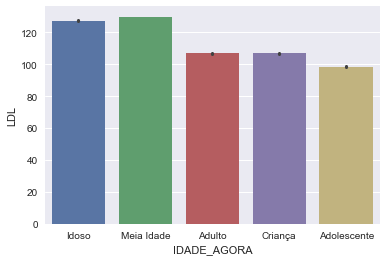

In [123]:
sns.barplot(idade_bands, 'LDL', data=full[full!=-1000], estimator=np.mean)

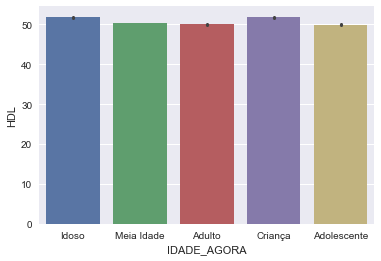

In [124]:
sns.barplot(idade_bands, 'HDL', data=full[full!=-1000], estimator=np.mean)

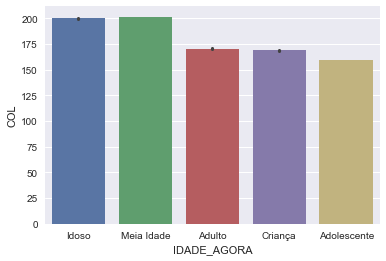

In [125]:
sns.barplot(idade_bands, 'COL', data=full[full!=-1000], estimator=np.mean)

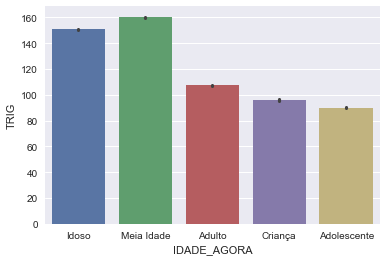

In [126]:
sns.barplot(idade_bands, 'TRIG', data=full[full!=-1000], estimator=np.mean)

### Idades + Sexo

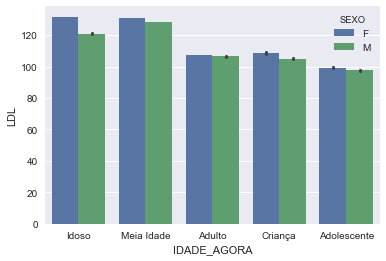

In [127]:
sns.barplot(idade_bands, 'LDL', data=full[full!=-1000], hue = "SEXO" ,estimator=np.mean)

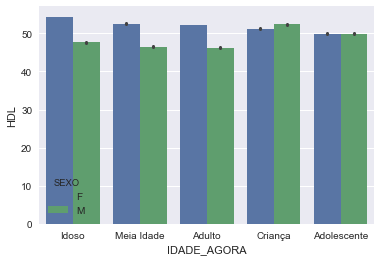

In [128]:
sns.barplot(idade_bands, 'HDL', data=full[full!=-1000], hue = "SEXO" ,estimator=np.mean)

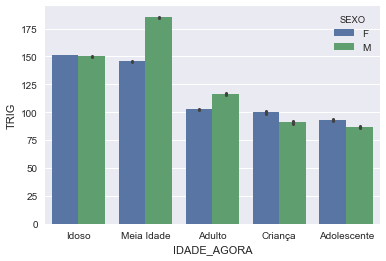

In [129]:
sns.barplot(idade_bands, 'TRIG', data=full[full!=-1000], hue = "SEXO" ,estimator=np.mean)

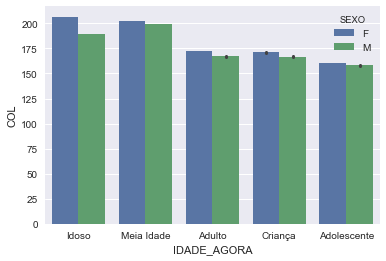

In [130]:
sns.barplot(idade_bands, 'COL', data=full[full!=-1000], hue = "SEXO" ,estimator=np.mean)

# Plotando a distribuição por idade dos valores de variáveis de medida

In [140]:
N = 1000

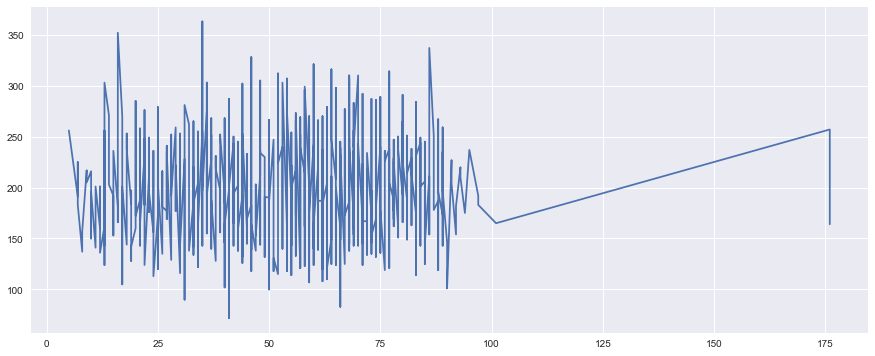

In [141]:
fig = plt.figure(figsize=(15, 6))
sample_idades = idades.sample(N).values
sample_col = col.sample(N).values

sample_idades.sort()
plt.plot(sample_idades,sample_col)

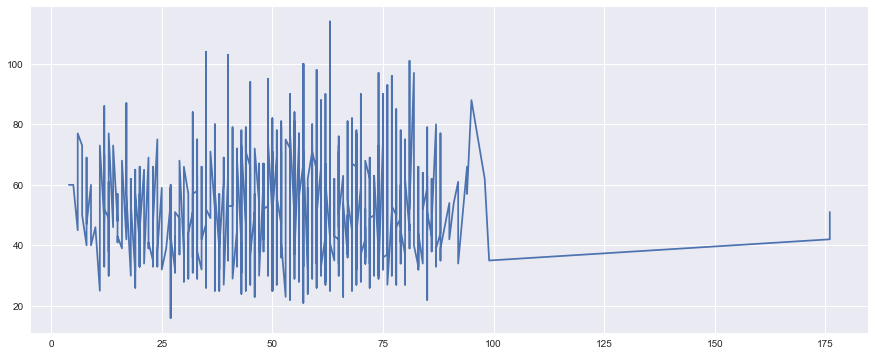

In [142]:
fig = plt.figure(figsize=(15, 6))
sample_idades = idades.sample(N).values
sample_col = HDL.sample(N).values

sample_idades.sort()
plt.plot(sample_idades,sample_col)

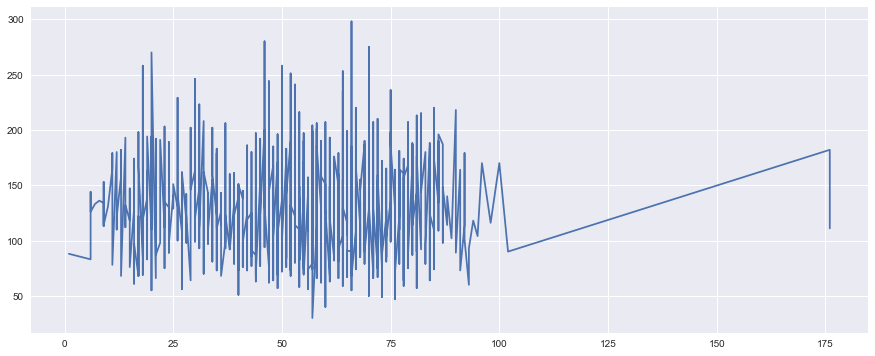

In [143]:
fig = plt.figure(figsize=(15, 6))
sample_idades = idades.sample(N).values
sample_col = LDL.sample(N).values

sample_idades.sort()
plt.plot(sample_idades,sample_col)

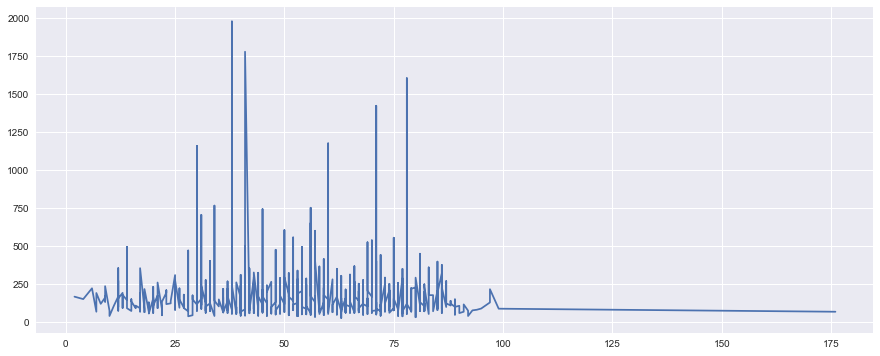

In [144]:
fig = plt.figure(figsize=(15, 6))
sample_idades = idades.sample(N).values
sample_col = TRIG.sample(N).values

sample_idades.sort()
plt.plot(sample_idades,sample_col)